In [1]:
import json
import geocoder
import time
from dotenv import load_dotenv
import os
import geopandas as gpd
import pandas as pd
import numpy as np

In [2]:
blocks = gpd.read_file('data/raw/tl_2023_36_bg.zip')

In [3]:
neighborhood = gpd.read_file('data/raw/2020 Neighborhood Tabulation Areas (NTAs)_20250711.geojson')

<Axes: >

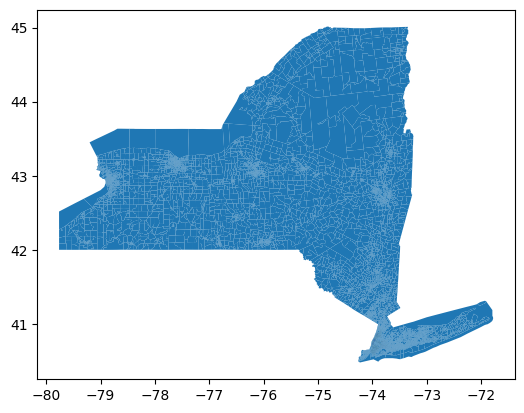

In [4]:
blocks.plot()

<Axes: >

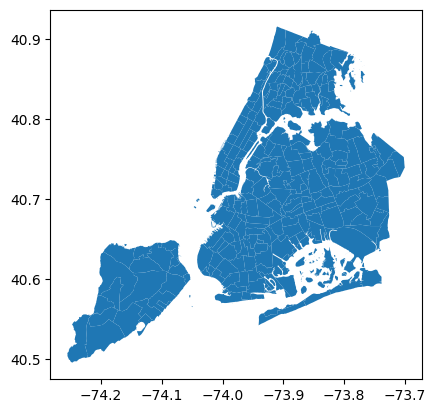

In [5]:
neighborhood.plot()

In [6]:
neighborhood.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
blocks = blocks.to_crs('EPSG:4326')

In [8]:
blocks.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
greenpoint = neighborhood[neighborhood['ntaname'] == 'Greenpoint']

In [20]:
greenpoint.to_file('data/processed/greenpoint.geojson')

In [15]:
gp_wb = neighborhood[neighborhood['ntaname'].isin(['Greenpoint', 'Williamsburg'])]

<Axes: >

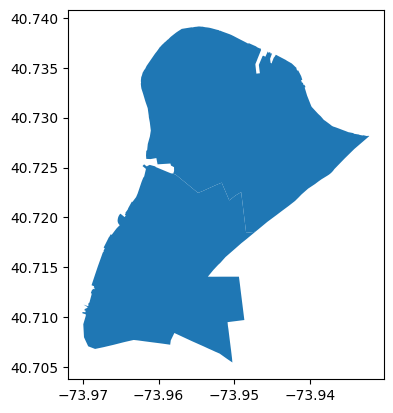

In [17]:
gp_wb.plot()

In [18]:
gp_wb.to_file('data/processed/gp_wb.geojson')

In [ ]:
greenpoint.plot()

In [ ]:
blocks_gp = gpd.overlay(blocks, greenpoint, how='intersection')

In [ ]:
blocks_gp.plot()

In [ ]:
blocks_gp.head(2)

In [ ]:
blocks_gp.to_file('data/processed/greenpoint_block.geojson')

In [ ]:
income = pd.read_csv('data/raw/median_income_ACSDT5Y2023.B19013-Data.csv', header=1)

In [ ]:
income.head()

In [ ]:
income = income.drop('Unnamed: 4', axis=1)

In [ ]:
income = income.drop('Geographic Area Name', axis=1)

In [ ]:
income.rename(columns={"Geography": "GEOIDFQ", "Estimate!!Median household income in the past 12 months (in 2023 inflation-adjusted dollars)":'income', 'Margin of Error!!Median household income in the past 12 months (in 2023 inflation-adjusted dollars)':'margin of error'}, inplace=True)

In [ ]:
len(income)

In [ ]:
blocks_gp_income = blocks_gp.merge(income, on="GEOIDFQ", how="left")

In [ ]:
blocks_gp_income = blocks_gp_income.replace("-", np.nan)

In [ ]:
blocks_gp_income["income"] = pd.to_numeric(blocks_gp_income["income"], errors="coerce")

In [ ]:
blocks_gp_income.to_file('data/processed/blocks_income.geojson')

In [ ]:
rent = pd.read_csv('data/raw/rent_ACSDT5Y2023.B25063-Data.csv', header=1)

In [ ]:
rent = rent.drop('Geographic Area Name', axis=1)

In [ ]:
rent.rename(columns={"Geography": "GEOIDFQ", "Estimate!!Median household income in the past 12 months (in 2023 inflation-adjusted dollars)":'income', 'Margin of Error!!Median household income in the past 12 months (in 2023 inflation-adjusted dollars)':'margin of error'}, inplace=True)

In [ ]:
streets = gpd.read_file('data/raw/tl_2024_36047_roads.zip')

In [ ]:
streets.crs

In [ ]:
greenpoint.crs

In [ ]:
streets = streets.to_crs('EPSG:4326')

In [ ]:
streets.crs

In [ ]:
streets.plot()

In [ ]:
greenpoint.plot()

In [ ]:
streets_gp = gpd.clip(streets, greenpoint)

In [ ]:
streets_gp.plot()

In [ ]:
streets_gp.to_file('data/processed/streets_gp.geojson')

In [ ]:
buildings = gpd.read_file('data/raw/BUILDING_20250718.geojson')

In [ ]:
buildings_gp = gpd.clip(buildings, greenpoint)

In [ ]:
buildings_gp['construction_year'] = pd.to_numeric(buildings_gp['construction_year'], errors='coerce')

In [ ]:
buildings_gp.to_file('data/processed/buildings_gp.geojson')